# Logistic Regression

==>  Logistic regression is basically a supervised classification algorithm. In a classification problem, the target variable(or output), y, can take only discrete values for given set of features(or inputs), X.

==> logistic regression is a regression model. 

==> The model builds a regression model to predict the probability that a given data entry belongs to the category numbered as “1”. 

==> Just like Linear regression assumes that the data follows a linear function, Logistic regression models the data using the sigmoid function.

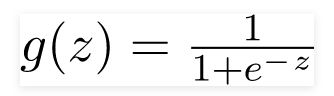

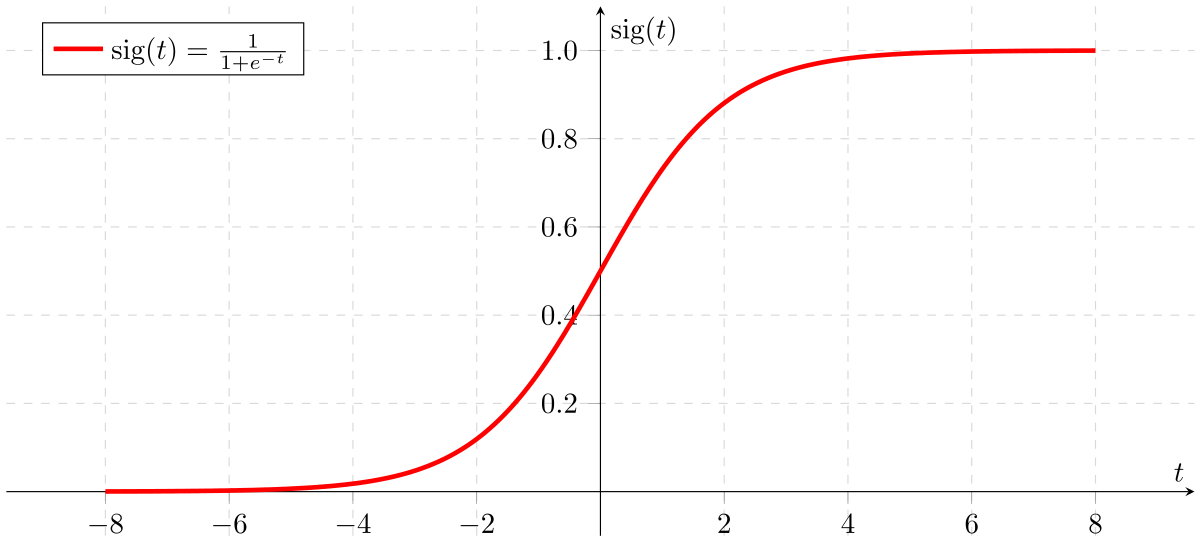

**Advantages:**

– Makes no assumptions about distributions of classes in feature space

– Easily extended to multiple classes (multinomial regression)

– Natural probabilistic view of class predictions Natural probabilistic view of class predictions

– Quick to train

– Very fast at classifying unknown records

– Good accuracy for many simple data sets

– Resistant to overfitting

– Can interpret model coefficients as indicators of feature importance

**Disadvantages:**

– Linear decision boundary

### Logistic Regression Example: 

### 1. Spam Detection

==> Spam detection is a binary classification problem where we are given an email and we need to classify whether or not it is spam. 

==> If the email is spam, we label it 1; if it is not spam, we label it 0. 

==> In order to apply Logistic Regression to the spam detection problem, the following features of the email are extracted:

    ==> Sender of the email
    
    ==> Number of typos in the email
    
    ==> Occurrence of words/phrases like “offer”, “prize”, “free gift”, etc.

==> The resulting feature vector is then used to train a Logistic classifier which emits a score in the range 0 to 1. 

==> If the score is more than 0.5, we label the email as spam. Otherwise, we don’t label it as spam.

### 2. Credit Card Fraud

==> The Credit Card Fraud Detection problem is of significant importance to the banking industry because banks each year spend hundreds of millions of dollars due to fraud. 

==> When a credit card transaction happens, the bank makes a note of several factors. 

==> For instance, the date of the transaction, amount, place, type of purchase, etc. 

==> Based on these factors, they develop a Logistic Regression model of whether or not the transaction is a fraud.

==> For instance, if the amount is too high and the bank knows that the concerned person never makes purchases that high, they may label it as a fraud.

### 3. Tumour Prediction

==> A Logistic Regression classifier may be used to identify whether a tumour is malignant or if it is benign. 

==> Several medical imaging techniques are used to extract various features of tumours. 

==> For instance, the size of the tumour, the affected body area, etc. 

==> These features are then fed to a Logistic Regression classifier to identify if the tumour is malignant or if it is benign

### 4. Marketing

==> Every day, when you browse your Facebook newsfeed, the powerful algorithms running behind the scene predict whether or not you would be interested in certain content (which could be, for instance, an advertisement). 

==> Such algorithms can be viewed as complex variations of Logistic Regression algorithms where the question to be answered is simple – will the user like this particular advertisement in his/her news feed?

==> These were some of the Logistic Regression examples that would have given you a feel of its use cases. 

==> Machine learning is a huge field and Logistic Regression is just a small part of it. 

==> Keep learning more and stay tuned to Magoosh for more blogs on data science!

## Example : 1

In [4]:
!pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/f7/08/25e47a53692c2e0dcd2211a493ddfe9007a5cd92e175d6dffa6169a0b392/tensorflow-1.14.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/32/e7/478737fd426798caad32a2abb7cc63ddb4c12908d9e03471dd3c41992b05/grpcio-1.23.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/d0/33/376510eb8d6246f3c30545f416b2263eee461e40940c2a4413c711bdf62d/google_pasta-0.1.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3c/d5/21860a5b11caf0678fbc8319341b0ae21a07156911132e0e71bffed0510d/tensorflow_estimator-1.14.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d1/4f/950dfae467b384fc96bc6469de25d832534f6b4441033c39f914efd13418/astor-0.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/46/8b/5e77963dac4a944a0c6b198c004fac4c85d7adc54221c288fc6ca9078072/protobuf-3.9.1-cp37-cp37m-win_amd64.whl
  Using cached https://files

tensorboard 1.14.0 has requirement setuptools>=41.0.0, but you'll have setuptools 40.8.0 which is incompatible.


In [5]:
# importing modules 
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder 

In [6]:
data = pd.read_csv('dataset.csv', header = None) 
print("Data Shape:", data.shape) 

print(data.head()) 

Data Shape: (100, 4)
   0    1    2  3
0  0  5.1  3.5  1
1  1  4.9  3.0  1
2  2  4.7  3.2  1
3  3  4.6  3.1  1
4  4  5.0  3.6  1


In [7]:
# Feature Matrix 
x_orig = data.iloc[:, 1:-1].values 

# Data labels 
y_orig = data.iloc[:, -1:].values 

print("Shape of Feature Matrix:", x_orig.shape) 
print("Shape Label Vector:", y_orig.shape) 

Shape of Feature Matrix: (100, 2)
Shape Label Vector: (100, 1)


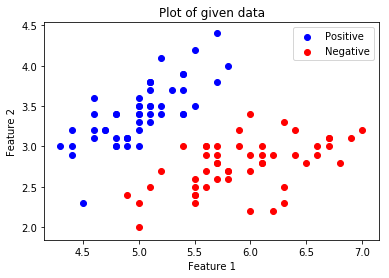

In [8]:
# Positive Data Points 
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) 
									if y_orig[i] == 1]) 

# Negative Data Points 
x_neg = np.array([x_orig[i] for i in range(len(x_orig)) 
									if y_orig[i] == 0]) 

# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 0], x_pos[:, 1], color = 'blue', label = 'Positive') 

# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 0], x_neg[:, 1], color = 'red', label = 'Negative') 

plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Plot of given data') 
plt.legend() 

plt.show() 

In [9]:
# Creating the One Hot Encoder 
oneHot = OneHotEncoder() 

# Encoding x_orig 
oneHot.fit(x_orig) 
x = oneHot.transform(x_orig).toarray() 

# Encoding y_orig 
oneHot.fit(y_orig) 
y = oneHot.transform(y_orig).toarray() 

alpha, epochs = 0.0035, 500
m, n = x.shape 
print('m =', m) 
print('n =', n) 
print('Learning Rate =', alpha) 
print('Number of Epochs =', epochs) 

m = 100
n = 7
Learning Rate = 0.0035
Number of Epochs = 500


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

In [10]:
# There are n columns in the feature matrix 
# after One Hot Encoding. 
X = tf.placeholder(tf.float32, [None, n]) 

# Since this is a binary classification problem, 
# Y can take only 2 values. 
Y = tf.placeholder(tf.float32, [None, 2]) 

# Trainable Variable Weights 
W = tf.Variable(tf.zeros([n, 2])) 

# Trainable Variable Bias 
b = tf.Variable(tf.zeros([2])) 

In [11]:
# Hypothesis 
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b)) 

# Sigmoid Cross Entropy Cost Function 
cost = tf.nn.sigmoid_cross_entropy_with_logits( 
					logits = Y_hat, labels = Y) 

# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer( 
		learning_rate = alpha).minimize(cost) 

# Global Variables Initializer 
init = tf.global_variables_initializer() 


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
	
	# Initializing the Variables 
	sess.run(init) 
	
	# Lists for storing the changing Cost and Accuracy in every Epoch 
	cost_history, accuracy_history = [], [] 
	
	# Iterating through all the epochs 
	for epoch in range(epochs): 
		cost_per_epoch = 0
		
		# Running the Optimizer 
		sess.run(optimizer, feed_dict = {X : x, Y : y}) 
		
		# Calculating cost on current Epoch 
		c = sess.run(cost, feed_dict = {X : x, Y : y}) 
		
		# Calculating accuracy on current Epoch 
		correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
										tf.argmax(Y, 1)) 
		accuracy = tf.reduce_mean(tf.cast(correct_prediction, 
												tf.float32)) 
		
		# Storing Cost and Accuracy to the history 
		cost_history.append(sum(sum(c))) 
		accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100) 
		
		# Displaying result on current Epoch 
		if epoch % 100 == 0 and epoch != 0: 
			print("Epoch " + str(epoch) + " Cost: "
							+ str(cost_history[-1])) 
	
	Weight = sess.run(W) # Optimized Weight 
	Bias = sess.run(b) # Optimized Bias 
	
	# Final Accuracy 
	correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
									tf.argmax(Y, 1)) 
	accuracy = tf.reduce_mean(tf.cast(correct_prediction, 
											tf.float32)) 
	print("\nAccuracy:", accuracy_history[-1], "%") 


Epoch 100 Cost: 125.70020294189453
Epoch 200 Cost: 120.6471176147461
Epoch 300 Cost: 118.15159225463867
Epoch 400 Cost: 116.54999923706055

Accuracy: 91.00000262260437 %


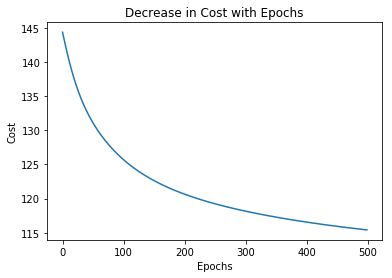

In [13]:
plt.plot(list(range(epochs)), cost_history) 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('Decrease in Cost with Epochs') 

plt.show() 


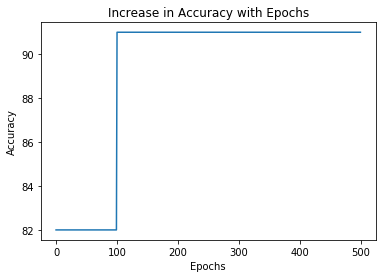

In [14]:
plt.plot(list(range(epochs)), accuracy_history) 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.title('Increase in Accuracy with Epochs') 

plt.show() 


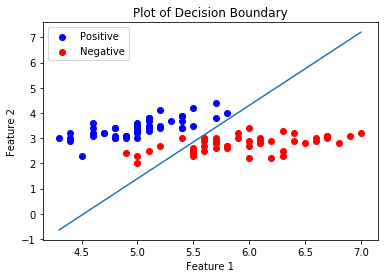

In [16]:
# Calculating the Decision Boundary 
decision_boundary_x = np.array([np.min(x_orig[:, 0]), 
							np.max(x_orig[:, 0])]) 

decision_boundary_y = (- 1.0 / Weight[0]) * (decision_boundary_x * Weight + Bias) 

decision_boundary_y = [sum(decision_boundary_y[:, 0]), 
					sum(decision_boundary_y[:, 1])] 

# Positive Data Points 
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) 
									if y_orig[i] == 1]) 

# Negative Data Points 
x_neg = np.array([x_orig[i] for i in range(len(x_orig)) 
									if y_orig[i] == 0]) 

# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 0], x_pos[:, 1], 
color = 'blue', label = 'Positive') 

# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 0], x_neg[:, 1], 
color = 'red', label = 'Negative') 

# Plotting the Decision Boundary 
plt.plot(decision_boundary_x, decision_boundary_y) 
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Plot of Decision Boundary') 
plt.legend() 

plt.show() 


https://towardsdatascience.com/real-world-implementation-of-logistic-regression-5136cefb8125

https://medium.com/deep-math-machine-learning-ai/chapter-2-0-logistic-regression-with-math-e9cbb3ec6077

### RAJKUMAR ZALAVADIA - Mo: 7041645834 Email : rajzalavadia50@gmail.com